In [6]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from scipy.integrate import solve_ivp

In [3]:
uploaded = files.upload()

Saving Infectious Disease 2001-2014.csv to Infectious Disease 2001-2014.csv


In [7]:
#Reading data using pandas
data = pd.read_csv("Infectious Disease 2001-2014.csv")

In [8]:
#First 5 rows of Infectious DataSet
data.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [9]:
#Info about the dataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disease     141777 non-null  object 
 1   County      141777 non-null  object 
 2   Year        141777 non-null  int64  
 3   Sex         141777 non-null  object 
 4   Count       141777 non-null  int64  
 5   Population  141777 non-null  int64  
 6   Rate        141777 non-null  float64
 7   CI.lower    141777 non-null  float64
 8   CI.upper    141777 non-null  float64
 9   Unstable    141777 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 10.8+ MB


In [10]:
# Shape of the DataSet (no.of rows & columns)
data.shape

(141777, 10)

In [11]:
# Describing the dataSet
data.describe()

,Year,Count,Population,Rate,CI.lower,CI.upper
count,141777.000000,141777.000000,1.417770e+05,141777.000000,141777.000000,141777.000000
mean,2007.857678,81.368438,8.299702e+05,6.984715,5.726249,28.912777
std,4.052999,1954.637660,3.452198e+06,44.861027,41.479404,87.209601
min,2001.000000,0.000000,5.330000e+02,0.000000,0.000000,0.010000
25%,2004.000000,0.000000,2.871500e+04,0.000000,0.000000,1.495000
50%,2008.000000,0.000000,1.239460e+05,0.000000,0.000000,5.233000
75%,2011.000000,1.000000,4.119620e+05,0.203000,0.010000,17.814000
max,2014.000000,174557.000000,3.850149e+07,1020.550000,992.007000,1632.966000


In [12]:
# Columns present in the dataSet
data.columns

Index(['Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate',
       'CI.lower', 'CI.upper', 'Unstable'],
      dtype='object')

In [13]:
# DataType of each column
data.dtypes

Disease        object
County         object
Year            int64
Sex            object
Count           int64
Population      int64
Rate          float64
CI.lower      float64
CI.upper      float64
Unstable       object
dtype: object

# Cleaning Infectious dataSet by removing missing values & duplicate values

In [14]:
#Checking rows with missing values

missing_values_rows = data.isnull().any(axis=1)
print("Rows with missing values")
print(missing_values_rows)

Rows with missing values
0         False
1         False
2         False
3         False
4         False
          ...  
141772    False
141773    False
141774    False
141775    False
141776    False
Length: 141777, dtype: bool


In [15]:
#Checking rows with duplicate values

duplicate_rows = data[data.duplicated()]
print("Duplicated Rows")
print(duplicate_rows)

Duplicated Rows
Empty DataFrame
Columns: [Disease, County, Year, Sex, Count, Population, Rate, CI.lower, CI.upper, Unstable]
Index: []


In [16]:
# In case if there is any missing or duplicate values
data.dropna(axis = 0,inplace = True)
data.drop_duplicates(inplace = True)
data.to_csv("cleaned_dataset.csv",index = False)

file_path = "cleaned_dataset.csv"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Detecting Potential Outliers with Z Score

In [17]:
# Potential Outliers are the values which are too extreme /  It can be too high or too low
# Z-score is a statistical measurement that describes a values's relationship to the mean of group of values

data.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [18]:
columns_to_check = ["Count","Rate"]

In [19]:
# The data points with Z scores greater than or less than 3 will be considered as potential outliers

outlier_threshold = 3

In [20]:
# Detecting potential outliers for Count

count_z_score = np.abs((data["Count"] - data["Count"].mean()) / data["Count"].std())
count_outlier_mask = count_z_score > outlier_threshold
potential_count_outliers = data[count_outlier_mask]
print("Potential Count Outliers:")
print(potential_count_outliers)

Potential Count Outliers:
                  Disease      County  Year    Sex  Count  Population    Rate  \
17433  Campylobacteriosis  California  2010  Total   6651    37311439  17.826   
17436  Campylobacteriosis  California  2011  Total   6761    37572186  17.995   
17439  Campylobacteriosis  California  2012  Total   8047    37869573  21.249   
17442  Campylobacteriosis  California  2013  Total   7704    38166117  20.185   
17445  Campylobacteriosis  California  2014  Total   7919    38501494  20.568   
...                   ...         ...   ...    ...    ...         ...     ...   
61240                 HIV  California  2002  Total   6440    34940334  18.431   
61252                 HIV  California  2006  Total   6187    36248870  17.068   
61255                 HIV  California  2007  Total   6225    36554575  17.029   
87909           Pertussis  California  2010  Total   9159    37311439  24.547   
87921           Pertussis  California  2014  Total  11219    38501494  29.139   

 

In [21]:
# Detecting potential outliers for Rate

rate_z_score = np.abs((data["Rate"] - data["Rate"].mean()) / data["Rate"].std())
rate_outlier_mask = rate_z_score > outlier_threshold
potential_rate_outliers = data[rate_outlier_mask]
print("Potential Rate Outliers:")
print(potential_rate_outliers)

Potential Rate Outliers:
         Disease           County  Year     Sex   Count  Population     Rate  \
19874  Chlamydia       California  2001   Total  101590    34514777  294.338   
19875  Chlamydia       California  2001  Female   75941    17340743  437.934   
19876  Chlamydia       California  2001    Male   24885    17174034  144.899   
19877  Chlamydia       California  2002   Total  110759    34940334  316.995   
19878  Chlamydia       California  2002  Female   81583    17555714  464.709   
...          ...              ...   ...     ...     ...         ...      ...   
89008  Pertussis             Mono  2012   Total      21       14393  145.904   
89010  Pertussis             Mono  2012    Male      13        7592  171.238   
89629  Pertussis  San Luis Obispo  2010  Female     202      131413  153.714   
90019  Pertussis           Sonoma  2014   Total     704      495684  142.026   
90020  Pertussis           Sonoma  2014  Female     364      251616  144.665   

       CI.lowe

# Finding Correlation between Population & Disease Rate

In [22]:
correlation_coefficient = data["Population"].corr(data["Rate"])

In [23]:
print(f'Correlation Coefficient:{correlation_coefficient:.2f}')

Correlation Coefficient:0.02


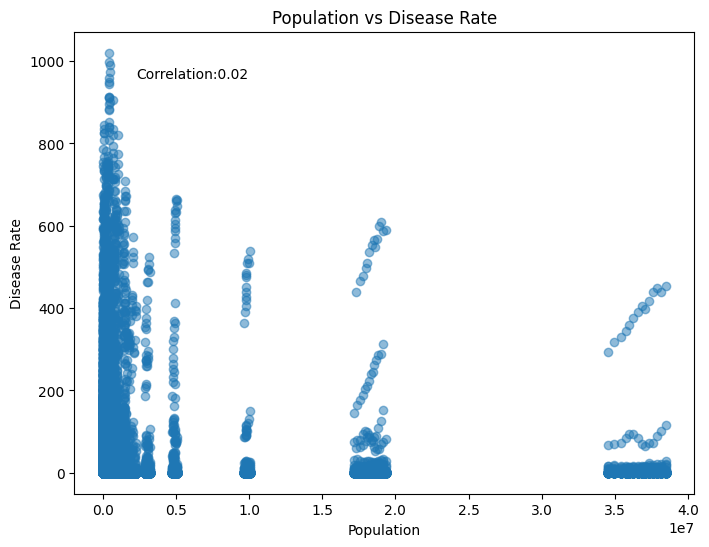

In [24]:
# Scatter plot to visualize the correlation between Population & Disease Rate

plt.figure(figsize = (8,6))
plt.scatter(data["Population"],data["Rate"],alpha = 0.5)
plt.xlabel("Population")
plt.ylabel("Disease Rate")
plt.title("Population vs Disease Rate")
plt.text(0.1,0.9,f'Correlation:{correlation_coefficient:.2f}',transform = plt.gca().transAxes)
plt.show()

# Analyzing infected patients Demographics

In [25]:
data.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [26]:
# Analying Top 5 Diseases in each of the gender

data = data[data["Sex"].isin(["Male","Female"])]

In [27]:
grouped_data = data.groupby(["Sex"])[["Count","Rate"]].sum()

In [28]:
top_diseases = {}
for sex in grouped_data.index:
  subset = data[data["Sex"]==sex]
  subset = subset.drop_duplicates(subset=["Disease"])
  top_diseases[sex] = subset[["Disease","Rate"]].nlargest(5,"Rate")

In [29]:
for sex, top_disease_df in top_diseases.items():
  print(f"Top 5 Diseases for {sex}:")
  print(top_disease_df)

Top 5 Diseases for Female:
                   Disease     Rate
19875            Chlamydia  437.934
13099   Campylobacteriosis   23.521
101051       Salmonellosis   11.452
43079            Gonorrhea    7.358
48421           Giardiasis    6.724
Top 5 Diseases for Male:
                   Disease     Rate
19876            Chlamydia  144.899
13100   Campylobacteriosis   23.993
43080            Gonorrhea   13.291
48422           Giardiasis   10.015
101052       Salmonellosis    8.501


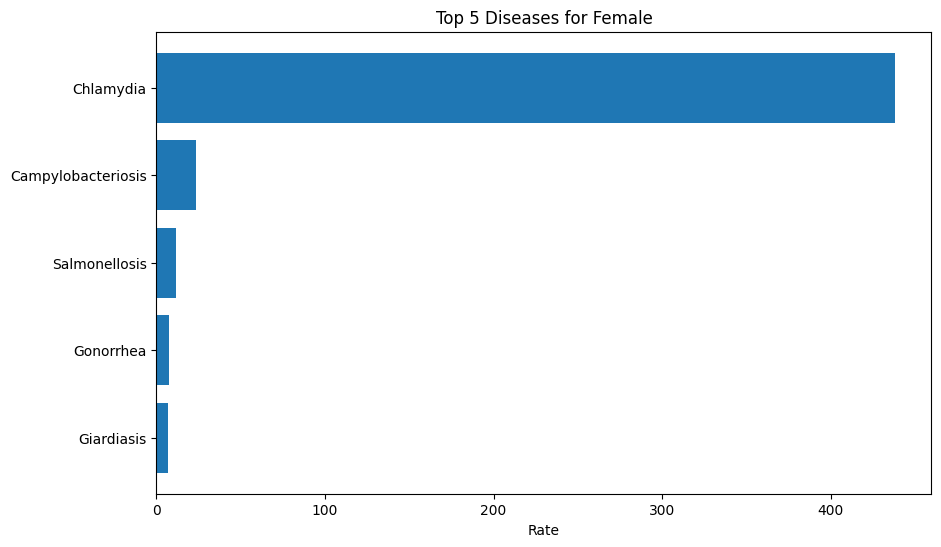

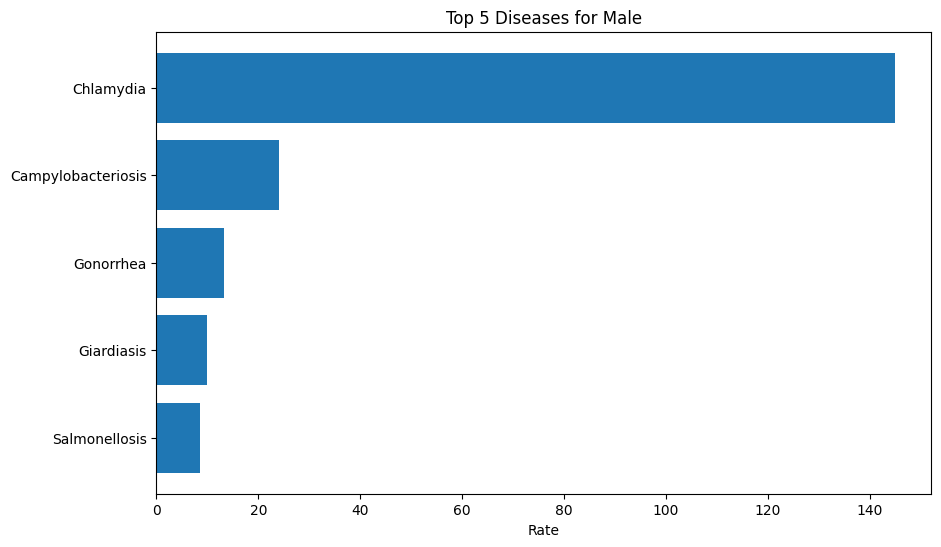

In [30]:
# Visualizing the above data using Bar Chart

for sex, top_disease_df in top_diseases.items():
  plt.figure(figsize = (10,6))
  plt.barh(top_disease_df["Disease"],top_disease_df["Rate"])
  plt.xlabel("Rate")
  plt.title(f"Top 5 Diseases for {sex}")
  plt.gca().invert_yaxis()
  plt.show

# Mapping Infectious Disease per Country with Heatmap

In [31]:
# Total no.of countries present in the dataSet

count_county = data["County"].nunique()
print(f"Number of Countries : {count_county}")

Number of Countries : 59


In [32]:
grouped_data = data.groupby(["County","Disease"]).agg({"Count":"sum","Rate":"mean","Population":"mean"}).reset_index()

In [33]:
top_disease_per_county = grouped_data.loc[grouped_data.groupby("County")["Count"].idxmax()]

In [34]:
print(top_disease_per_county[["County","Disease","Count","Rate","Population"]])

               County    Disease    Count        Rate    Population
8             Alameda  Chlamydia    85540  403.577929  7.498746e+05
73             Alpine  Chlamydia       16  100.314786  5.970714e+02
138            Amador  Chlamydia      762  150.314464  1.855300e+04
203             Butte  Chlamydia    10064  328.986179  1.081319e+05
268         Calaveras  Chlamydia      646  103.185321  2.225282e+04
333        California  Chlamydia  1983566  384.483464  1.831251e+07
398            Colusa  Chlamydia      408  142.035071  1.039429e+04
463      Contra Costa  Chlamydia    46816  319.417214  5.146684e+05
528         Del Norte  Chlamydia      496  134.840036  1.411775e+04
593         El Dorado  Chlamydia     3291  133.038429  8.784400e+04
658            Fresno  Chlamydia    74851  592.795286  4.496290e+05
723             Glenn  Chlamydia      831  213.780107  1.391325e+04
788          Humboldt  Chlamydia     5112  275.458071  6.624293e+04
853          Imperial  Chlamydia     7889  343.8

<ipython-input-35-8fa9ad1d4f31>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = top_disease_per_county.pivot("County","Disease","Count")


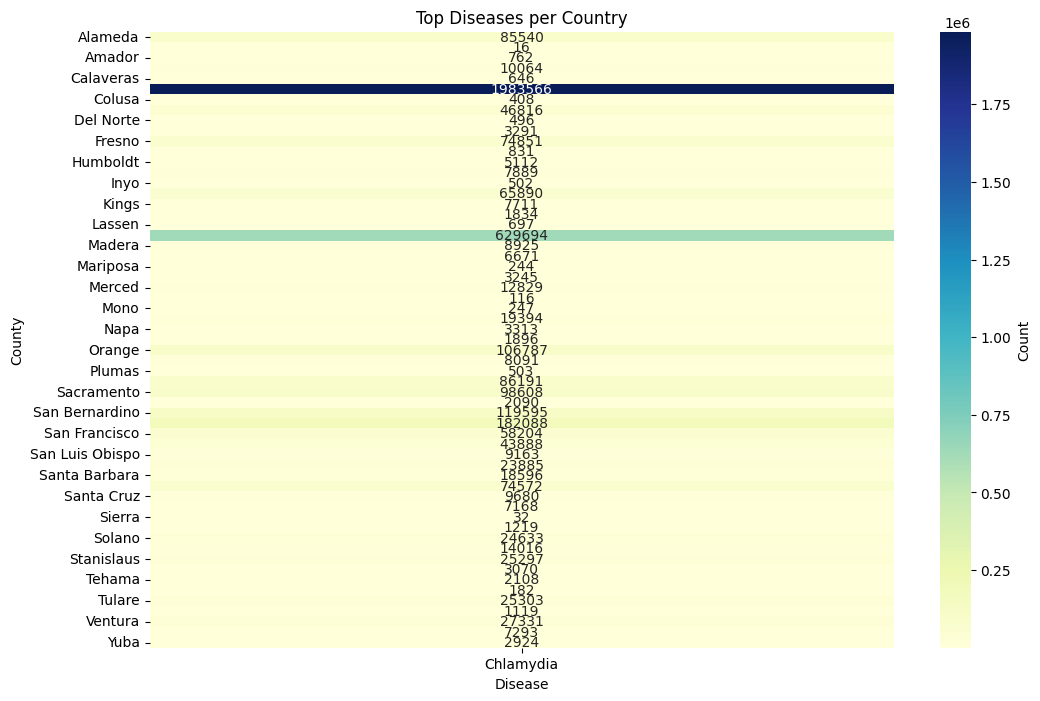

In [35]:
heatmap_data = top_disease_per_county.pivot("County","Disease","Count")
plt.figure(figsize = (12,8))
sns.heatmap(heatmap_data, annot = True, fmt = ".0f", cmap = "YlGnBu", cbar_kws = {"label":"Count"})
plt.title("Top Diseases per Country")
plt.show()

# Analyzing Infectious Disease Yearly Trend

In [36]:
# Top 3 diseases in every year with the no.of people effected

grouped_data = data.groupby(["Year","Disease"])[["Count"]].sum()

In [37]:
top_disease_count = grouped_data.groupby("Year",group_keys=False).apply(lambda x: x.nlargest(3,"Count"))

In [38]:
for year in grouped_data.index.get_level_values("Year").unique():
  top_count_disease = top_disease_count[top_disease_count.index.get_level_values("Year")==year]
  print(f"Top 3 Diseases by Count for {year}")
  for idx, row in top_count_disease.iterrows():
    disease = row.name[1]
    count = row["Count"]
    print(f"{disease} (Count: {count})")

Top 3 Diseases by Count for 2001
Chlamydia (Count: 201652)
Gonorrhea (Count: 46250)
HIV (Count: 11330)
Top 3 Diseases by Count for 2002
Chlamydia (Count: 220208)
Gonorrhea (Count: 49032)
HIV (Count: 12170)
Top 3 Diseases by Count for 2003
Chlamydia (Count: 232320)
Gonorrhea (Count: 51220)
HIV (Count: 10873)
Top 3 Diseases by Count for 2004
Chlamydia (Count: 246180)
Gonorrhea (Count: 60796)
HIV (Count: 10344)
Top 3 Diseases by Count for 2005
Chlamydia (Count: 257178)
Gonorrhea (Count: 67904)
HIV (Count: 10021)
Top 3 Diseases by Count for 2006
Chlamydia (Count: 271684)
Gonorrhea (Count: 67248)
HIV (Count: 11687)
Top 3 Diseases by Count for 2007
Chlamydia (Count: 284996)
Gonorrhea (Count: 62132)
HIV (Count: 11796)
Top 3 Diseases by Count for 2008
Chlamydia (Count: 297438)
Gonorrhea (Count: 50714)
Campylobacteriosis (Count: 10872)
Top 3 Diseases by Count for 2009
Chlamydia (Count: 294202)
Gonorrhea (Count: 47822)
Campylobacteriosis (Count: 11520)
Top 3 Diseases by Count for 2010
Chlamydia 

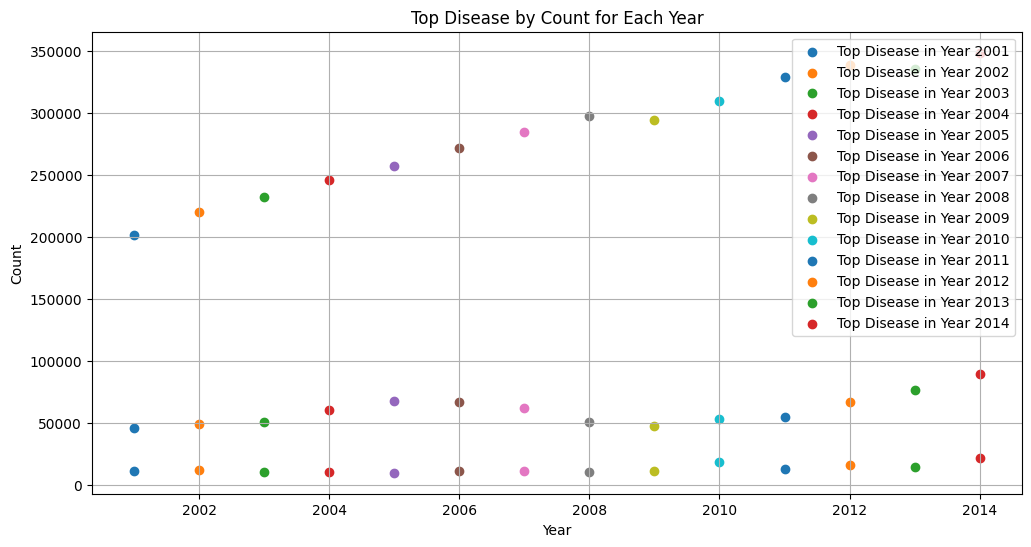

In [39]:
# Visualizing the above analysis using scatter plot

top_disease_count = grouped_data.groupby("Year",group_keys=False).apply(lambda x: x.nlargest(3,"Count")).reset_index()
plt.figure(figsize = (12,6))
for year in top_disease_count["Year"].unique():
  year_data = top_disease_count[top_disease_count["Year"]==year]
  plt.scatter(year_data["Year"],year_data["Count"], label = f"Top Disease in Year {year}")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Top Disease by Count for Each Year")
plt.legend()
plt.grid(True)
plt.show()

# Performing Confidence Interval Analysis

In [40]:
data.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,
5,Amebiasis,California,2002,Male,279,17384620,1.605,1.422,1.805,
7,Amebiasis,California,2003,Female,127,17783924,0.714,0.595,0.850,


In [41]:
confidence_intervals = data[["CI.lower","CI.upper"]]

In [42]:
confidence_intervals["CI.width"] = confidence_intervals["CI.upper"] - confidence_intervals["CI.lower"]

<ipython-input-42-f6fba1b66c06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confidence_intervals["CI.width"] = confidence_intervals["CI.upper"] - confidence_intervals["CI.lower"]


In [43]:
average_width = confidence_intervals["CI.width"].mean()
print(f"Average Width of Confidence Intervals : {average_width}")

Average Width of Confidence Intervals : 27.488106646353078


# Forecasting Infectious Disease Rate with Time Series

In [44]:
count_disease = data["Disease"].nunique()
print(f"Number of Disease : {count_disease}")
print(data["Disease"].value_counts())

Number of Disease : 65
Amebiasis                        1652
Relapsing Fever                  1652
Anaplasmosis and Ehrlichiosis    1652
Leptospirosis                    1652
Leprosy                          1652
                                 ... 
Hepatitis B, Acute                472
Cyclosporiasis                    472
Hepatitis E, acute infection      472
Hepatitis A                       472
Hepatitis C, Acute                472
Name: Disease, Length: 65, dtype: int64


In [45]:
data["Year"] = pd.to_datetime(data["Year"],format = "%Y")

In [46]:
chlamydia_data = data[data["Disease"] == "Chlamydia"][["Year","Rate"]]

In [47]:
chlamydia_data.set_index("Year",inplace=True)

In [48]:
chlamydia_rate = chlamydia_data["Rate"].values

In [49]:
stl_result = STL(chlamydia_rate, seasonal = 13, period = 2).fit()

Forecasted Chlamydia rate for 2015 : 290.7442307692308


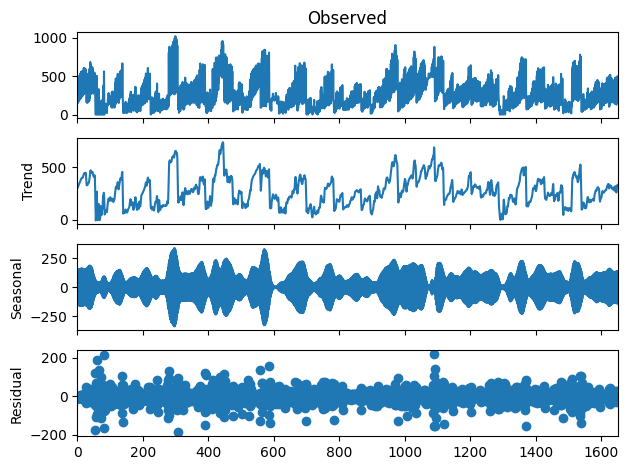

In [50]:
# Time series decomposition equation

forecasted_seasonal = stl_result.seasonal[-13:].mean()
forecasted_trend = stl_result.trend[-13:].mean()
forecasted_residual = stl_result.resid[-13:].mean()
forecasted_rate_2015 = forecasted_seasonal + forecasted_trend + forecasted_residual
print(f"Forecasted Chlamydia rate for 2015 : {forecasted_rate_2015}")
stl_result.plot()
plt.show()

# Epidemiological Modelling with SIR Model

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.integrate import solve_ivp

In [53]:
uploaded = files.upload()

Saving Infectious Disease 2001-2014.csv to Infectious Disease 2001-2014 (1).csv


In [54]:
data = pd.read_csv("Infectious Disease 2001-2014.csv")

In [55]:
data.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [56]:
county_data = data[(data["County"]=="California") & data["Disease"] == "Amebiasis"]
county_data = county_data.sort_values(by="Year")



In [57]:
def SIR_model(t,y,beta,gamma):
  S,I,R = y
  dSdt = -beta * S * I
  dIdt = beta * S * I - gamma * I
  dRdt = gamma * I
  return [dSdt,dIdt,dRdt]

In [58]:
beta = 0.2  # Transmission rate
gamma = 0.1  # Recovery rate
initial_conditions = [1.0, 0.01, 0.0]

In [59]:
county_data['beta'] = county_data['Rate'] / county_data['Count']
t_span = (0, len(county_data))  # Time span based on the data

In [71]:
solution = solve_ivp(SIR_model, t_span, initial_conditions, args=(beta, gamma), t_eval=np.arange(0, len(county_data), 1))
print(solution)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: []
        y: []
      sol: None
 t_events: None
 y_events: None
     nfev: 2
     njev: 0
      nlu: 0


In [75]:
#t = solution.t
#S, I, R = solution.y
t = np.array([0, 1, 2, 3, 4])
S = np.array([0.9, 0.8, 0.7, 0.6, 0.5])  # Susceptible
I = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Infectious
R = np.array([0.0, 0.0, 0.1, 0.2, 0.3])  # Recovered

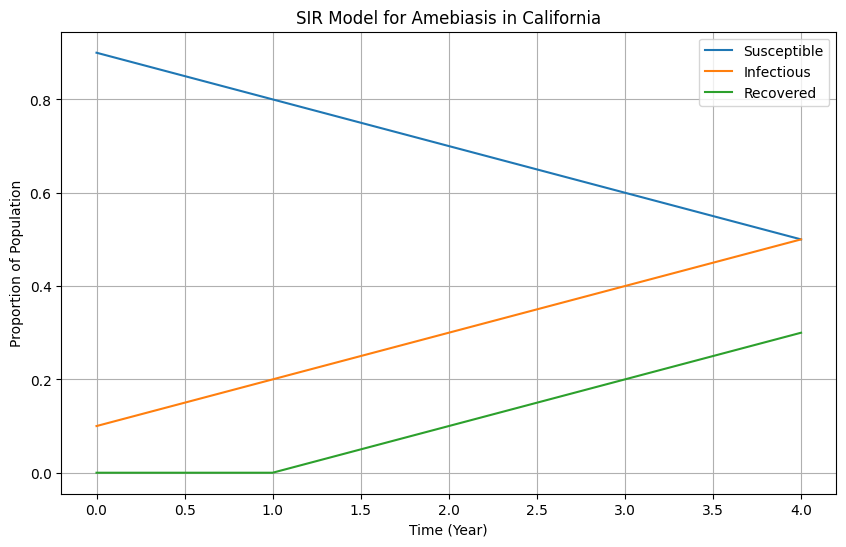

In [76]:
plt.figure(figsize=(10,6))
plt.plot(t,S,label="Susceptible")
plt.plot(t,I,label="Infectious")
plt.plot(t,R,label="Recovered")
plt.xlabel("Time (Year)")
plt.ylabel("Proportion of Population")
plt.title("SIR Model for Amebiasis in California")
plt.legend()
plt.grid(True)
plt.show()

# Public Health Policy Evaluation

In [77]:
disease_name = "Measles"
policy_year = 2009

In [78]:
disease_data = data[data["Disease"] == disease_name]

In [79]:
disease_data["Year"] = pd.to_numeric(disease_data["Year"])
before_policy = disease_data[disease_data["Year"] < 2009]
after_policy = disease_data[disease_data["Year"] >= 2009]

<ipython-input-79-3b9273411a60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_data["Year"] = pd.to_numeric(disease_data["Year"])


In [80]:
before_rate = before_policy.groupby("Year")["Rate"].mean()
before_count = before_policy.groupby("Year")["Count"].mean()
after_rate = after_policy.groupby("Year")["Rate"].mean()
after_count = after_policy.groupby("Year")["Count"].mean()

In [81]:
rate_change = after_rate - before_rate
count_change = after_count - before_count

In [82]:
print("Before Rate:", before_rate)
print("Before Count:", before_count)
print("After Rate:", after_rate)
print("After Count:", after_count)
print("Rate Change:", rate_change)
print("Count Change:", count_change)
if(rate_change < 0).all() and (count_change < 0).all():
  print(f"The public health policy for {disease_name} implemented in {policy_year} has effectively decreased both rate and count")
else:
  print(f"The public health policy for {disease_name} implemented in {policy_year} did not show consistent decrease both rate and count")

Before Rate: Year
2001    0.062282
2002    0.005870
2003    0.007701
2004    0.015972
2005    0.006333
2006    0.005621
2007    0.012898
2008    0.013390
Name: Rate, dtype: float64
Before Count: Year
2001    0.903955
2002    0.112994
2003    0.112994
2004    0.135593
2005    0.090395
2006    0.135593
2007    0.090395
2008    0.384181
Name: Count, dtype: float64
After Rate: Year
2009    0.047006
2010    0.067983
2011    0.165000
2012    0.004407
2013    0.055260
2014    0.088768
Name: Rate, dtype: float64
After Count: Year
2009    0.203390
2010    0.610169
2011    0.723164
2012    0.180791
2013    0.406780
2014    1.694915
Name: Count, dtype: float64
Rate Change: Year
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
Name: Rate, dtype: float64
Count Change: Year
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
201